In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit
from quantimpy import minkowski as mk
from mpl_toolkits.mplot3d import Axes3D

# Identifying the Normalization Constants



In [2]:
grid_dimensions = 300 #Number of grid points in each dimension
center = [grid_dimensions//2, grid_dimensions//2, grid_dimensions//2] #Center of the grid

radius = 75 #Radius of the sphere

In [3]:
volume_object = np.zeros((grid_dimensions, grid_dimensions, grid_dimensions), dtype=bool)
x, y, z = center
r = radius
# Create a grid of coordinates
coords = np.indices((grid_dimensions, grid_dimensions, grid_dimensions))

# Calculate the squared distance from the center (x, y, z)
squared_distances = (coords[0] - x) ** 2 + (coords[1] - y) ** 2 + (coords[2] - z) ** 2

# Create a mask where the squared distance is less than or equal to r^2
mask = squared_distances <= r ** 2

# Apply the mask to the volume array
volume_object[mask] = True

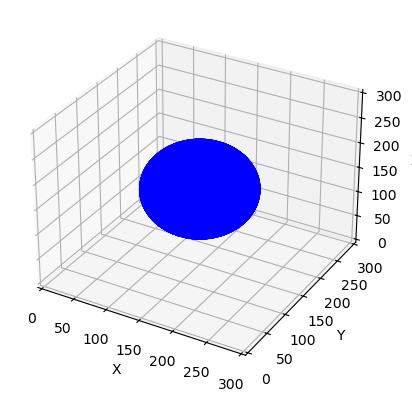

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get the indices of the True values in the volume array
indices = np.where(volume_object)

# Plot the points
ax.scatter(indices[0], indices[1], indices[2], c='blue')

# Set the plot limits
ax.set_xlim(0, grid_dimensions)
ax.set_ylim(0, grid_dimensions)
ax.set_zlim(0, grid_dimensions)

# Set the labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

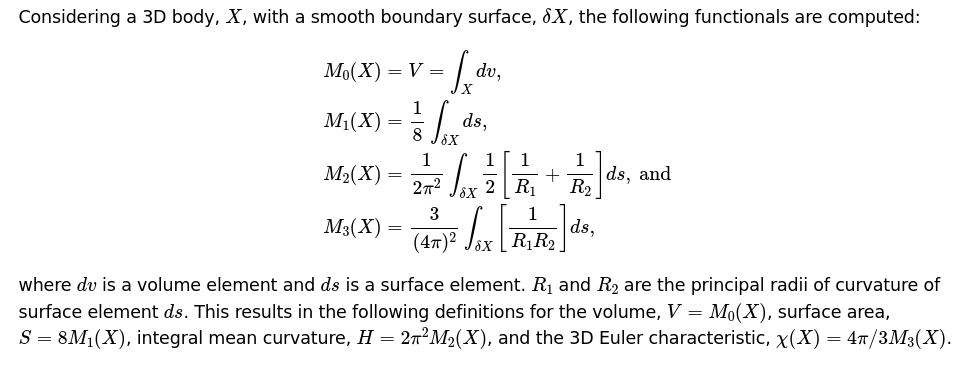

In [5]:
# Compute the Minkowski functionals for the volume
minkowski_functionals = mk.functionals(volume_object)
volume, surface_area, mean_curvature, euler_characteristic = minkowski_functionals

print("Volume:", volume)
print("Surface area:", surface_area)
print("Mean curvature:", mean_curvature)
print("Euler characteristic:", euler_characteristic)

Volume: 1767063.0
Surface area: 8832.960980210793
Mean curvature: 47.87881673621515
Euler characteristic: 0.238732414637843


In [6]:
# Calculate the volume
volume_analytical = (4/3) * np.pi * radius**3

# Calculate the surface area
surface_area_analytical = (2 * np.pi * radius**2) / 3

# Calculate the mean curvature
mean_curvature_analytical = 4 * radius / 3

print("Volume:", volume_analytical)
print("Surface area:", surface_area_analytical)
print("Mean curvature:", mean_curvature_analytical)

Volume: 1767145.8676442585
Surface area: 11780.972450961724
Mean curvature: 100.0


In [7]:
print("Normalization Constant for Volume:", volume_analytical/volume) #This is practically 1
print("Normalization Constant for Surface Area:", surface_area_analytical/surface_area) #This is practically 8
print("Normalization Constant for Mean Curvature:", mean_curvature_analytical/mean_curvature) #This needs more figuring out

Normalization Constant for Volume: 1.0000468956931692
Normalization Constant for Surface Area: 1.3337512163085066
Normalization Constant for Mean Curvature: 2.0886063360952027


In [8]:
def add_balls(center, radius):
    """
    Takes input of the center and radius, adds a ball at the specified center and radius, and returns the volume.

    Parameters:
    - center (tuple): The coordinates of the center of the ball in the form (x, y, z).
    - radius (float): The radius of the ball.

    Returns:
    - volume (ndarray): A 3D numpy array with dimensions (grid_dimensions, grid_dimensions, grid_dimensions).
                       The array represents a volume where everything is marked as False except for the positions
                       within the ball, which are marked as True.

    """
    
    volume = np.zeros((grid_dimensions, grid_dimensions, grid_dimensions), dtype=bool)
    x, y, z = center
    r = radius
    # Create a grid of coordinates
    coords = np.indices((grid_dimensions, grid_dimensions, grid_dimensions))
    
    # Calculate the squared distance from the center (x, y, z)
    squared_distances = (coords[0] - x) ** 2 + (coords[1] - y) ** 2 + (coords[2] - z) ** 2
    
    # Create a mask where the squared distance is less than or equal to r^2
    mask = squared_distances <= r ** 2
    
    # Apply the mask to the volume array
    volume[mask] = True
    return volume

def compute_minkowski_functionals(ball_radius):
    """
    Create a volume with balls and compute the Minkowski functionals.

    Parameters:
    - ball_radius: Radius of the balls to be added

    Returns:
    - Minkowski functionals computed for the volume
    """
    

    # Add balls to the volume
    volume = add_balls(center, ball_radius)
    
    # Compute the Minkowski functionals for the volume
    minkowski_functionals = mk.functionals(volume)

    return minkowski_functionals


In [9]:
radii = [50 + 1*i for i in range(100)]
volume_ratios = []
surface_area_ratios = []
mean_curvature_ratios = []

for radius in tqdm(radii):
    #Calculating the Minkowski functionals
    volume_i, surface_area_i, mean_curvature_i, euler_characteristic_i = compute_minkowski_functionals(radius)

    # Calculate the volume
    volume_analytical = (4/3) * np.pi * radius**3

    # Calculate the surface area
    surface_area_analytical = (2 * np.pi * radius**2) / 3

    # Calculate the mean curvature
    mean_curvature_analytical = 4 * radius / 3

    #Calculating the ratios
    volume_ratios.append(volume_analytical/volume_i)
    surface_area_ratios.append(surface_area_analytical/surface_area_i)
    mean_curvature_ratios.append(mean_curvature_analytical/mean_curvature_i)
print("Done calculating the ratios")



100%|██████████| 100/100 [01:55<00:00,  1.15s/it]

Done calculating the rations


In [11]:
volume_ratios = np.asarray(volume_ratios)
surface_area_ratios = np.asarray(surface_area_ratios)
mean_curvature_ratios = np.asarray(mean_curvature_ratios)

print("Average Volume Ratio:", np.mean(volume_ratios))
print("Average Surface Area Ratio:", np.mean(surface_area_ratios))
print("Average Mean Curvature Ratio:", np.mean(mean_curvature_ratios))


Average Volume Ratio: 1.0001639568861314
Average Surface Area Ratio: 1.3338620556133909
Average Mean Curvature Ratio: 2.0913489776470016
